# Atelier - séance 6
L'objectif de l'atelier est d'utiliser des données réelles afin d'en extraire des informations sous forme de tableaux ou de visualisations. Ces données traitent de la livraison de différents produits, entre des ports d'origine et des ports de destination. De plus, certaines informations additionnelles sont fournies avec ces livraisons, tel que le coût et la quantité. Ces données réelles sont une version modifiée du [*Supply Chain Logistics Problem Dataset*](https://brunel.figshare.com/articles/Supply_Chain_Logistics_Problem_Dataset/7558679). Vous pouvez consulter ce site web pour des informations additionnelles (limitées) concernant les différentes variables.

Pour faire ces analyses et visualisations, vous utiliserez les librairies `pandas` et `seaborn` comme à l'habitude. Au besoin, vous pouvez aussi importer des librairies additionnelles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Chargement des données
Toutes les données sont contenues dans différentes feuilles du fichier Excel `OrdersData.xlsx` ci-joint, en particulier:
* la feuille *OrderList* contient la liste des commandes;
* la feuille *FreightRates* fait le lien entre un transporteur, le poids de la marchandise et le prix de transport;
* la feuille *WhCosts* fait le lien entre une usine et le coût d'importation depuis cette usine;
* la feuille *WhCapacities* fait le lien entre une usine et la capacité journalière de production de cette usine;
* la feuille *ProductsPerPlant* fait le lien entre un produit et son usine de fabrication;
* la feuille *VmiCustomers* fait le lien entre une usine de fabrication et le client associé; et
* la feuille *PlantPorts* fait le lien entre une usine de fabrication et le port d'origine associé.

Dans un premier temps, vous devez charger les feuilles de calculs Excel nécessaires dans des `DataFrame`. Pour ce faire, vous pouvez consulter la [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) de la fonction à utiliser. Après avoir chargé les données, vous pouvez vérifier que les données ont été importées correctement. Au besoin, vous pouvez ajouter des cellules de code dans cette section.

In [2]:
# Charge les données nécessaires dans différents dataframes depuis les feuilles de calculs
order_list = pd.read_excel('OrdersData.xlsx', sheet_name='OrderList', 
                           dtype={'Order ID': str, 'Product ID': str})  # pour assurer un bel affichage (optionnel)
freight_rates = pd.read_excel('OrdersData.xlsx', sheet_name='FreightRates')
wh_costs = pd.read_excel('OrdersData.xlsx', sheet_name='WhCosts')
wh_capacities = pd.read_excel('OrdersData.xlsx', sheet_name='WhCapacities')
products_per_plant = pd.read_excel('OrdersData.xlsx', sheet_name='ProductsPerPlant',
                                   dtype={'Product ID': str})  # pour assurer un bel affichage (optionnel)
vmi_customers = pd.read_excel('OrdersData.xlsx', sheet_name='VmiCustomers')
plant_ports = pd.read_excel('OrdersData.xlsx', sheet_name='PlantPorts')

In [3]:
print(order_list.dtypes)  # pour valider les formats
order_list.head()  # pour voir les premières lignes de données

Order ID                        object
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                            float64
Service Level                   object
Ship ahead day count           float64
Ship Late Day count            float64
Customer                        object
Product ID                      object
Plant Code                      object
Destination Port                object
Unit quantity                  float64
Weight                         float64
Unnamed: 14                    float64
Unnamed: 15                    float64
Unnamed: 16                    float64
Unnamed: 17                    float64
Unnamed: 18                    float64
dtype: object


,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1447296446.7,2013-05-26,PORT09,V44_3,1.0,CRF,3.0,0.0,V55555_53,1700106,PLANT16,PORT09,808.0,14.30,NaN,NaN,NaN,NaN,NaN
1,1447158014.7,2013-05-26,PORT09,V44_3,1.0,CRF,3.0,0.0,V55555_53,1700106,PLANT16,PORT09,3188.0,87.94,NaN,NaN,NaN,NaN,NaN
2,1447138898.7,2013-05-27,PORT09,V44_3,1.0,CRF,3.0,0.0,V55555_53,1700106,PLANT16,PORT09,2331.0,61.20,NaN,NaN,NaN,NaN,NaN
3,1447363527.7,2013-05-28,PORT09,V44_3,1.0,CRF,3.0,0.0,V55555_53,1700106,PLANT16,PORT09,847.0,16.16,NaN,NaN,NaN,NaN,NaN
4,1447363980.7,2013-05-28,PORT09,V44_3,1.0,CRF,3.0,0.0,V55555_53,1700106,PLANT16,PORT09,2163.0,52.34,NaN,NaN,NaN,NaN,NaN


In [4]:
print(freight_rates.dtypes)
freight_rates.head()

Carrier          object
orig_port_cd     object
dest_port_cd     object
minm_wgh_qty    float64
max_wgh_qty     float64
svc_cd           object
minimum cost    float64
rate            float64
mode_dsc         object
tpt_day_cnt       int64
Carrier type     object
dtype: object


,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,svc_cd,minimum cost,rate,mode_dsc,tpt_day_cnt,Carrier type
0,V444_6,PORT08,PORT09,250.0,499.99,DTD,43.2272,0.7132,AIR,2,V88888888_0
1,V444_6,PORT08,PORT09,65.0,69.99,DTD,43.2272,0.7512,AIR,2,V88888888_0
2,V444_6,PORT08,PORT09,60.0,64.99,DTD,43.2272,0.7892,AIR,2,V88888888_0
3,V444_6,PORT08,PORT09,50.0,54.99,DTD,43.2272,0.8272,AIR,2,V88888888_0
4,V444_6,PORT08,PORT09,35.0,39.99,DTD,43.2272,1.0552,AIR,2,V88888888_0


In [5]:
print(wh_costs.dtypes)
wh_costs.head()

WH            object
Cost/unit    float64
dtype: object


,WH,Cost/unit
0,PLANT15,1.415063
1,PLANT17,0.428947
2,PLANT18,2.036254
3,PLANT05,0.488144
4,PLANT02,0.477504


In [6]:
print(wh_capacities.dtypes)
wh_capacities.head()

Plant ID           object
Daily Capacity      int64
dtype: object


,Plant ID,Daily Capacity
0,PLANT15,11
1,PLANT17,8
2,PLANT18,111
3,PLANT05,385
4,PLANT02,138


In [7]:
print(products_per_plant.dtypes)
products_per_plant.head()

Plant Code    object
Product ID    object
dtype: object


,Plant Code,Product ID
0,PLANT03,1613321
1,PLANT03,1615677
2,PLANT12,1617714
3,PLANT12,1617826
4,PLANT03,1620510


In [8]:
print(vmi_customers.dtypes)
vmi_customers.head()

Plant Code    object
Customers     object
dtype: object


,Plant Code,Customers
0,PLANT02,V5555555555555_16
1,PLANT02,V555555555555555_29
2,PLANT02,V555555555_3
3,PLANT02,V55555555555555_8
4,PLANT02,V55555555_9


In [9]:
print(plant_ports.dtypes)
plant_ports.head()

Plant Code    object
Port          object
dtype: object


,Plant Code,Port
0,PLANT01,PORT01
1,PLANT01,PORT02
2,PLANT02,PORT03
3,PLANT03,PORT04
4,PLANT04,PORT05


# Nettoyage et transformation des données
Le nettoyage et la transformation des données est un élément clé permettant de s'assurer de l'intégrité des données qui seront utilisées par la suite. Bien que cette étape soit nécessaire, elle peut s'avérer frustrante et demander beaucoup de temps. Voici quelques questions à vous poser durant cette étape:

* Est-ce que vos dates sont correctement formatées?
* Est-ce que vos champs de texte sont déformés?
* Est-ce qu'il y a des valeurs manquantes? Si oui, comment devraient-elles être traitées?
* Est-ce qu'il y a des données incohérentes?

Dans cette partie du Jupyter Notebook, vous devez seulement nettoyer et transformer les données de la feuille *OrderList*. Rappelez-vous qu'il existe deux types de valeurs manquantes: celles manquantes de façon aléatoire (*MAR*) et celles manquantes de façon non-aléatoire (*MNAR*). Pour cet atelier, les lignes possédant des données manquantes de façon aléatoire (*MAR*) seront supprimées alors que les lignes possédant des données manquantes de façon non-aléatoire (*MNAR*) seront remplacées. 

Après différentes discussions avec les personnes s'occupant de l'entrée de données, vous apprenez qu'il y a souvent des valeurs manquantes dans les colonnes `Plant Code` et `Origin Port`, car ces personnes n'entrent pas ces valeurs lorsqu'il est possible de les déduire respectivement des feuilles *ProductsPerPlant* et *PlantPorts*. Ces valeurs sont donc manquantes de façon non-aléatoire (*MNAR*). Pour ces données manquantes, vous pouvez assumer qu'il n'y a qu'un seul `Plant Code` par `Product ID` dans la feuille *ProductsPerPlant* et qu'un seul `Origin Port` par `Plant Code` dans la feuille *PlantPorts*.

De plus, vous apprenez que les valeurs manquantes dans les autres colonnes manquent de façon aléatoire (*MAR*) et qu'il n'est pas possible de déduire les valeurs manquantes pour ces colonnes avec les autres feuilles.

Finalement, vous aprenez qu'il est nécessaire de supprimer les lignes possédant un transporteur `Carrier` non répertorié dans la feuille `FreightRates`. Ces lignes correspondent à des tests effectués sur le système et non pas à des vrais données; ces lignes doivent donc être supprimées avant les prochaines étapes.

In [10]:
def get_plant_code(row):
    """
    Remplace (si nécessaire) le Plant Code à l'aide du Product ID de la commande. Sinon
    renvoie le Plant Code existant.
    Paramètres:
        row: Series, ligne de commande
    Renvoie:
        Chaîne de caractères, Plant Code
    """
    # Plant Code est manquant
    if pd.isnull(row['Plant Code']):
        mask = products_per_plant['Product ID'] == row['Product ID']
        if mask.sum() > 1:  # pour valider si plus d'un Plant Code par Product ID (optionnel)
            print(f"Multiple 'Plant Code' values for 'Product ID' {row['Product ID']}")
        return products_per_plant.loc[mask].reset_index().loc[0,'Plant Code']
    # Plant Code est présent
    else:
        return row['Plant Code']  

def get_origin_port(row):
    """
    Remplace (si nécessaire) le Origin Port à l'aide du Plant Code de la commande. Sinon
    renvoie le Origin Port existant.
    Paramètres:
        row: Series, ligne de commande
    Renvoie:
        Chaîne de caractères, Origin Port
    """
    # Origin Port est manquant
    if pd.isnull(row['Origin Port']):
        mask = plant_ports['Plant Code'] == row['Plant Code']
        if mask.sum() > 1:  # pour valider si plus d'un Origin Port par Plant Code (optionnel)
            print(f"Multiple 'Origin Port' values for 'Plant Code' {row['Plant Code']}")
        return plant_ports.loc[mask].reset_index().loc[0, 'Port']
    # Origin Port est présent
    else:
        return row['Origin Port']

# Regarde le nombre de valeurs manquantes avant changement
print("VALEURS MANQUANTES INITIALES:")
print(order_list.isnull().sum())
        
# Supprime les lignes sans Order ID, Order Date, Carrier, TPT, Service Level, 
# Ship ahead day count, Ship Late Day count, Customer, Product ID, Destination Port, 
# Unit quantity ou Weight
mask = order_list.loc[:, ['Order ID', 'Order Date', 'Carrier', 'TPT', 'Service Level', 'Ship ahead day count',
                          'Ship Late Day count', 'Customer', 'Product ID', 'Destination Port', 'Unit quantity',
                          'Weight']].isnull().any(axis='columns')
order_list_new = order_list.loc[~mask].reset_index(drop=True)

# Supprime les lignes avec des transporteurs non répertoriés dans la feuille FreightRates
carriers = freight_rates.Carrier.unique()
mask = order_list_new.Carrier.isin(carriers)
order_list_new = order_list_new.loc[mask].reset_index(drop=True)

# Affecte Plant Code en utilisant Product ID dans la feuille ProductsPerPlant (si nécessaire)
order_list_new['Plant Code'] = order_list_new.apply(get_plant_code, axis='columns')
 
# Affecte Origin Port en utilisant Plant Code dans la feuille PlantPorts (si nécessaire)
order_list_new['Origin Port'] = order_list_new.apply(get_origin_port, axis='columns')

# Regarde le nombre de valeurs manquantes après changement
print("\nVALEURS MANQUANTES FIN:")
print(order_list_new.isnull().sum())

# Remplacer order_list par order_list_new
order_list = order_list_new

# order_list_new.to_excel("new_data.xlsx")  # sauvegarder en fichier Excel pour validation

VALEURS MANQUANTES INITIALES:
Order ID                  94
Order Date                 0
Origin Port              100
Carrier                   88
TPT                        6
Service Level              6
Ship ahead day count       6
Ship Late Day count        6
Customer                   6
Product ID                99
Plant Code               114
Destination Port          88
Unit quantity             84
Weight                   103
Unnamed: 14             9215
Unnamed: 15             9215
Unnamed: 16             9215
Unnamed: 17             9215
Unnamed: 18             9215
dtype: int64

VALEURS MANQUANTES FIN:
Order ID                   0
Order Date                 0
Origin Port                0
Carrier                    0
TPT                        0
Service Level              0
Ship ahead day count       0
Ship Late Day count        0
Customer                   0
Product ID                 0
Plant Code                 0
Destination Port           0
Unit quantity              0
Weig

# Analyse des données
Maintenant que les données sont nettoyées, vous pouvez les utiliser en sachant qu'il n'y aura pas d'incohérences. Vous pouvez donc effectuer des analyses sur ces données. En particulier, vous devez obtenir les informations suivantes:
1. le produit commandé ayant le plus petit ratio `Weight`/`Unit Quantity`, en utilisant les informations de la feuille *OrderList*;
2. le coût d'importation associé à chaque commande, en utilisant les informations des feuilles *OrderList* et *WhCosts*;
3. le coût de transport quotidien pour chaque transporteur, en utilisant les informations des feuilles *OrderList* et *FreightRates* (veuillez noter que `minimum cost` correspond aux frais fixes de transport, et que `rate` doit être multiplié avec `Weight`); et
4. la date à laquelle chaque transporteur a transporté le plus de produits (en poids), en utilisant les informations de la feuille *OrderList*.

In [11]:
# Identifie le Product ID commandé avec le plus petit ratio quantité/poids
order_list['Weight/unit'] = order_list.Weight / order_list['Unit quantity']

product_id = order_list.sort_values(by='Weight/unit', ascending=True).reset_index().loc[0,'Product ID']
product_id

'1669409'

In [12]:
# Calcule le coût d'importation associé à chaque commande
left = order_list.set_index('Plant Code')
right = wh_costs.set_index('WH')
order_list = left.join(right).reset_index().rename(columns={'index': 'Plant Code'})

order_list['Import Cost'] = order_list['Cost/unit'] * order_list['Unit quantity']
order_list = order_list.drop(columns=['Cost/unit'])
order_list.head()

,Plant Code,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,...,Destination Port,Unit quantity,Weight,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Weight/unit,Import Cost
0,PLANT03,1447330514.7,2013-05-26,PORT04,V444_0,2.0,DTP,0.0,0.0,V555555555555555_29,...,PORT09,337.0,2.19,NaN,NaN,NaN,NaN,NaN,0.006499,174.398137
1,PLANT03,1447330516.7,2013-05-27,PORT04,V444_0,2.0,DTP,0.0,0.0,V555555555555555_29,...,PORT09,286.0,2.74,NaN,NaN,NaN,NaN,NaN,0.009580,148.005541
2,PLANT03,1447168423.7,2013-05-27,PORT04,V444_0,2.0,DTP,0.0,0.0,V555555555555555_29,...,PORT09,317.0,5.73,NaN,NaN,NaN,NaN,NaN,0.018076,164.048100
3,PLANT03,1447330513.7,2013-05-27,PORT04,V444_0,2.0,DTP,0.0,0.0,V555555555555555_29,...,PORT09,262.0,2.21,NaN,NaN,NaN,NaN,NaN,0.008435,135.585496
4,PLANT03,1447365952.7,2013-05-28,PORT04,V444_0,2.0,DTP,0.0,0.0,V555555555555555_29,...,PORT09,346.0,9.72,NaN,NaN,NaN,NaN,NaN,0.028092,179.055655


In [13]:
def compute_transportation_cost(row):
    """
    Renvoie le coût de transport associé à la commande
    Paramètres:
        row: Series, ligne de commande
    Renvoie:
        Nombre, coût de transport associé à la commande
    """
    mask = ((freight_rates['Carrier'] == row['Carrier']) & 
            (freight_rates['orig_port_cd'] == row['Origin Port']) &
            (freight_rates['dest_port_cd'] == row['Destination Port']) &
            (freight_rates['minm_wgh_qty'] <= row['Weight']) &
            (freight_rates['max_wgh_qty'] >= row['Weight']))   
    if mask.sum() > 1:  # valider qu'un seul coût s'applique (optionnel)
        print('Multiple potential costs...')
    select = freight_rates.loc[mask].reset_index()
    min_cost = select.loc[0, 'minimum cost']
    rate = select.loc[0, 'rate']
    return min_cost + row.Weight * rate
   
# Calcule coût total de transport de chaque transporteur, pour chaque jour
# Le coût est calculé en utilisant la fomule Coût total = Coût de base + Poids * Taux
order_list['Transportation Cost'] = order_list.apply(compute_transportation_cost, axis='columns')

transportation_costs = order_list.groupby(['Order Date','Carrier'])['Transportation Cost'].sum().reset_index()
transportation_costs.head()

,Order Date,Carrier,Transportation Cost
0,2013-05-26,V444_0,3473.032800
1,2013-05-26,V444_1,399.369260
2,2013-05-27,V444_0,1702.103900
3,2013-05-27,V444_1,312.899972
4,2013-05-28,V444_0,1070.101336


In [14]:
def is_max(row):
    """
    Renvoie True si cette ligne correspond à la journée avec le poids maximal, sinon
    renvoie False.
    Paramètres:
        row: Series, ligne de weight_per_day
    Renvoie:
        Booléen
    """
    max_weight = max_weights.loc[row.Carrier]
    if row.Weight == max_weight:
        return True
    else:
        return False
    
# Identifie la journée à laquelle chaque transporteur est le plus chargé
weight_per_day = order_list.groupby(['Carrier', 'Order Date']).Weight.sum().reset_index()
max_weights = weight_per_day.groupby(['Carrier']).Weight.max()
weight_per_day['is_max'] = weight_per_day.apply(is_max, axis='columns')
max_weight_days = weight_per_day.loc[weight_per_day['is_max'], ['Order Date', 'Carrier', 'Weight']].reset_index(drop=True)
max_weight_days

,Order Date,Carrier,Weight
0,2013-05-26,V444_0,3651.75
1,2013-05-26,V444_1,788.01


# Visualisation des données
Une fois les données nettoyées, vous pouvez aussi les utiliser pour faire des visualisations. En particulier, vous devez maintenant faire les visualisations suivantes:
1. évolution du coût de transport quotidien pour chaque transporteur à travers le temps;
2. quantité envoyée par chaque usine le 28 mai 2013; et
3. répartition des paires de valeurs `Unit quantity` (en $x$) et `Weight` (en $y$) pour chaque commande et mode de transport associé (le mode de transport est donné par la colonne `mode_dsc` de la feuille *FreightRates*).

Si le temps vous le permet, vous pouvez améliorer ces visualisations en suivant les bonnes pratiques vues dans le cours.

<AxesSubplot:title={'center':'Daily transportation costs across time'}, xlabel='Order Date', ylabel='Transportation Cost'>

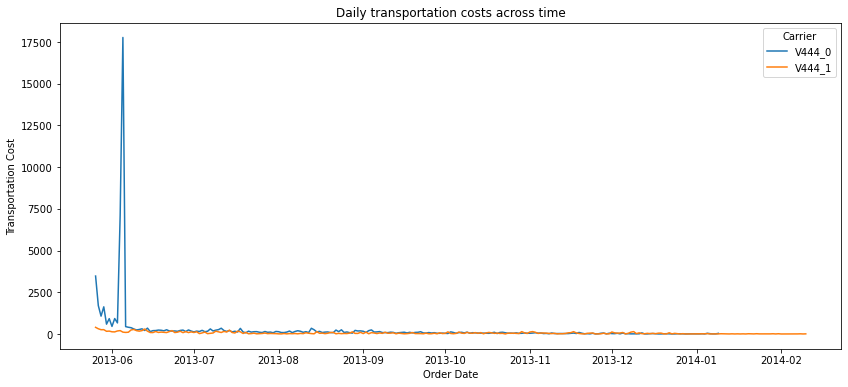

In [15]:
# Affiche l'évolution du coût de transport quotidien pour chaque transporteur à travers le temps
daily_costs = transportation_costs.reset_index()
plt.figure(figsize=(14, 6))
plt.title('Daily transportation costs across time')
sns.lineplot(data=daily_costs, x='Order Date', y='Transportation Cost', hue='Carrier')

<AxesSubplot:title={'center':'Daily quantity per plant'}, xlabel='Plant Code', ylabel='Unit quantity'>

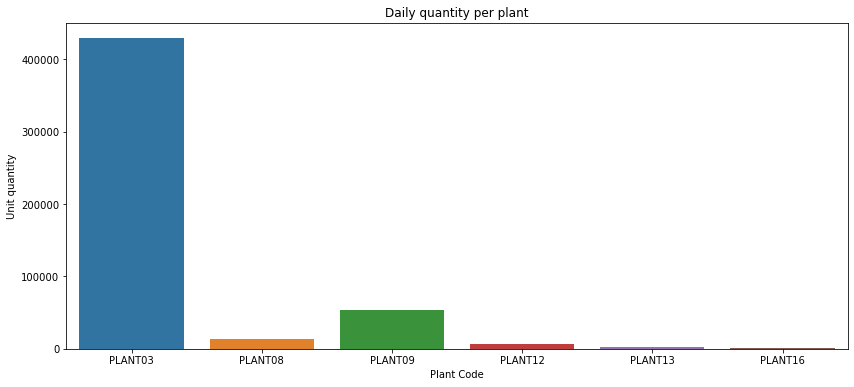

In [16]:
# Affiche la quantité envoyée par chaque usine pour le 28 mai 2013
mask = order_list['Order Date'] == '2013-05-28'
daily_quantity = order_list.loc[mask].groupby('Plant Code')['Unit quantity'].sum()
plt.figure(figsize=(14, 6))
plt.title('Daily quantity per plant')
sns.barplot(x=daily_quantity.index, y=daily_quantity)

<AxesSubplot:title={'center':'Transporation mode used for different quantity/weight combination'}, xlabel='Unit quantity', ylabel='Weight'>

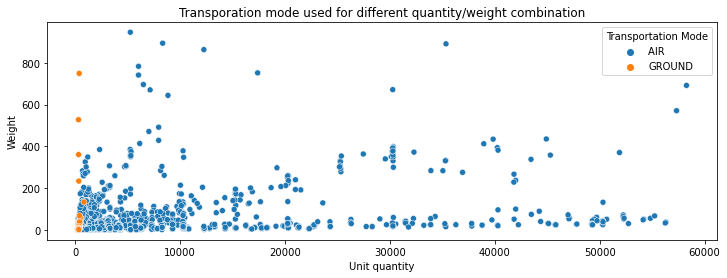

In [17]:
def compute_transportation_mode(row):
    """
    Renvoie le mode de transport de la commande
    Paramètres:
        row: Series, ligne de commande
    Renvoie:
        Chaine de caractères, Mode de transport associé à la commande
    """
    mask = ((freight_rates['Carrier'] == row['Carrier']) &
            (freight_rates['orig_port_cd'] == row['Origin Port']) &
            (freight_rates['dest_port_cd'] == row['Destination Port']) &
            (freight_rates['minm_wgh_qty'] <= row['Weight']) &
            (freight_rates['max_wgh_qty'] >= row['Weight']))
    select = freight_rates.loc[mask].reset_index()
    return select.loc[0, 'mode_dsc']

# Affiche la répartition des paires de valeurs Unit quantity et Weight pour chaque commande et mode de transport associé
order_list['Transportation Mode'] = order_list.apply(compute_transportation_mode, axis='columns')

plt.figure(figsize=(12,4))
plt.title('Transporation mode used for different quantity/weight combination')
sns.scatterplot(data=order_list, x='Unit quantity', y='Weight', hue='Transportation Mode')